In [1]:
import sys, os
import numpy as np
sys.path.insert(0, os.path.realpath(os.path.join(os.getcwd(), '..')))
import matplotlib.pyplot as plt
import IPython
%matplotlib inline
from typing import List
import re

#------------self build functions----------------
sys.path.append('/project/chihway/junzhou/functions')
from Convert import convert_c2f
from Sub import Sub
from Change import change
from Compare import compare_theory_vectors_1, compare_theory_vectors_2, compare_theory_vectors_3
from Add import add

### This notebook is for testing parameters of firecrown config files

~~First I wanna develope a pipeline to fairly convert cocoa paramters to firecrown parameters~~ Done

second I think we can begin testing some parameters of firecrown such as:
~~1. nonlinear: none | pk | lens~~ conclusion: use pk 
~~2. match cocoa and firecrown kmax, should be easier low down k_max of firecrown("k_max": self.kmax_boltzmann * self.accuracyboost ?)~~ barely no change
~~3. try to directly use As instead of sigma_8 in value.ini~~ stable
4. halofit_version: default (mead) -> takahashi
   use_ppf_w : default (False) -> True
   AccuracyBoost: default (1.0) -> 1.05 : covered by likelihood or not?
   k_per_logint: defaut (0.0) -> 20

...

~~so it should be good to write a method to sub value for parameters~~ Done

In [2]:
# overwrite input parameters
readpath = '/project/chihway/junzhou/cocoa/Cocoa/projects/des_y3/chains/des_y1_3x2pt.1.txt'
for i in range(1,4):
    outputpath = f'/project/chihway/junzhou/firecrown/examples/des_y1_3x2pt/cosmosis/values_3x2pt_test{i}.ini'
    convert_c2f(readpath, outputpath, overwrite=True)
# now change the option of nonlinear
nonlinear = ['none', 'pk', 'lens']
for i, option in enumerate(nonlinear):
    filepath = f'/project/chihway/junzhou/firecrown/examples/des_y1_3x2pt/cosmosis/factory_3x2pt_test{i+1}.ini'
    Sub(filepath, 'nonlinear', option)
# other things need to change
#outputfilepath
save_dir = ['output_factory1','output_factory2','output_factory3']
for i, option in enumerate(save_dir):
    filepath = f'/project/chihway/junzhou/firecrown/examples/des_y1_3x2pt/cosmosis/factory_3x2pt_test{i+1}.ini'
    Sub(filepath, 'save_dir', option)
#parameter value file
values = [f'${{FIRECROWN_DIR}}/examples/des_y1_3x2pt/cosmosis/values_3x2pt_test{i}.ini' for i in range(1,4)]
for i, option in enumerate(values):
    filepath = f'/project/chihway/junzhou/firecrown/examples/des_y1_3x2pt/cosmosis/factory_3x2pt_test{i+1}.ini'
    Sub(filepath, 'values', option)
    

In [3]:
%%bash

eval "$(conda shell.bash hook)"
conda activate firecrown_developer
cd ./firecrown/examples/des_y1_3x2pt

srun --nodes=1 --ntasks=1 --cpus-per-task=7 \
     --time=00:10:00 --account=pi-chihway --partition=caslake \
     cosmosis cosmosis/factory_3x2pt_test1.ini &

srun --nodes=1 --ntasks=1 --cpus-per-task=7 \
     --time=00:10:00 --account=pi-chihway --partition=caslake \
     cosmosis cosmosis/factory_3x2pt_test2.ini &

srun --nodes=1 --ntasks=1 --cpus-per-task=7 \
     --time=00:10:00 --account=pi-chihway --partition=caslake \
     cosmosis cosmosis/factory_3x2pt_test3.ini &

wait
#cosmosis cosmosis/factory_3x2pt_test1.ini
#cosmosis cosmosis/factory_3x2pt_test2.ini
#cosmosis cosmosis/factory_3x2pt_test3.ini


srun: Verify job submission ...
srun: Using a shared partition ...
srun: Partition: caslake
srun: QOS-Flag: caslake
srun: Account: pi-chihway
srun: Verification: ***PASSED***
srun: job 31978212 queued and waiting for resources
srun: Verify job submission ...
srun: Using a shared partition ...
srun: Partition: caslake
srun: QOS-Flag: caslake
srun: Account: pi-chihway
srun: Verification: ***PASSED***
srun: job 31978211 queued and waiting for resources
srun: Verify job submission ...
srun: Using a shared partition ...
srun: Partition: caslake
srun: QOS-Flag: caslake
srun: Account: pi-chihway
srun: Verification: ***PASSED***
srun: job 31978210 queued and waiting for resources
srun: job 31978210 has been allocated resources
srun: job 31978211 has been allocated resources
srun: job 31978212 has been allocated resources


Setting up pipeline from parameter file cosmosis/factory_3x2pt_test3.ini
------------------------------------------------------------------------

Setting up module consistency
------------------------------

Setting up module camb
-----------------------

Setting up module firecrown_likelihood
---------------------------------------
Setup all pipeline modules

Module timing:
consistency 0.002006
camb 0.002188
firecrown_likelihood 0.445439

Parameter Priors
----------------
cosmological_parameters--omega_c     ~ delta(0.24963745836910997)
cosmological_parameters--omega_b     ~ delta(0.044)
cosmological_parameters--omega_k     ~ delta(0.0)
cosmological_parameters--tau         ~ delta(0.0697186)
cosmological_parameters--n_s         ~ delta(0.968)
cosmological_parameters--sigma_8     ~ delta(0.84892334)
cosmological_parameters--h0          ~ delta(0.6881)
cosmological_parameters--w           ~ delta(-1.0)
cosmological_parameters--wa          ~ delta(0.0)
cosmological_parameters--mnu      

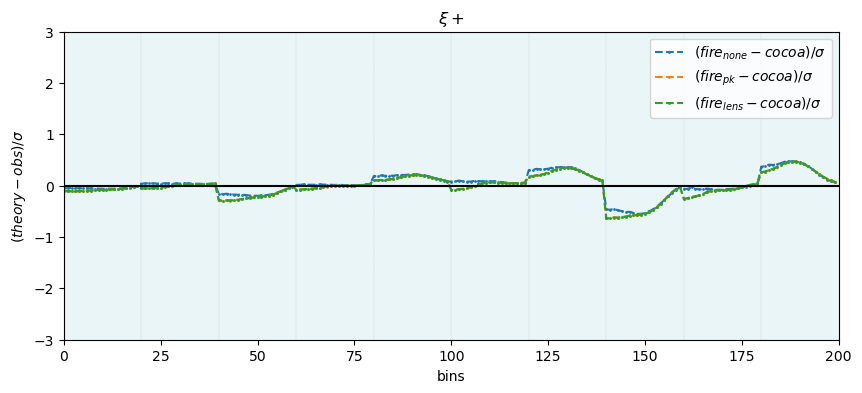

<Figure size 640x480 with 0 Axes>

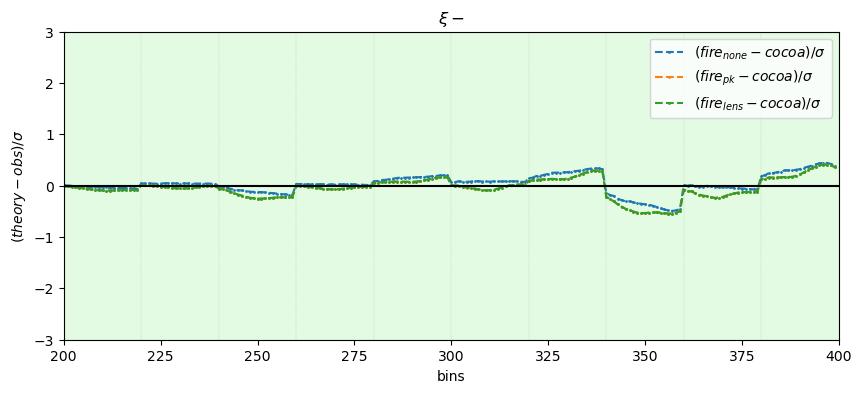

<Figure size 640x480 with 0 Axes>

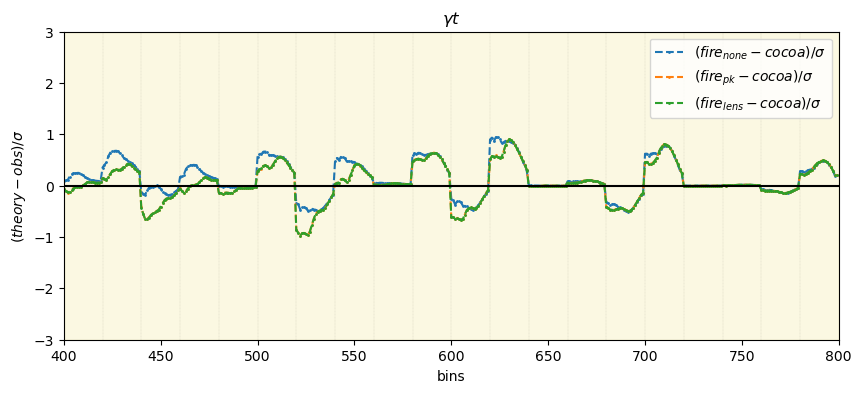

<Figure size 640x480 with 0 Axes>

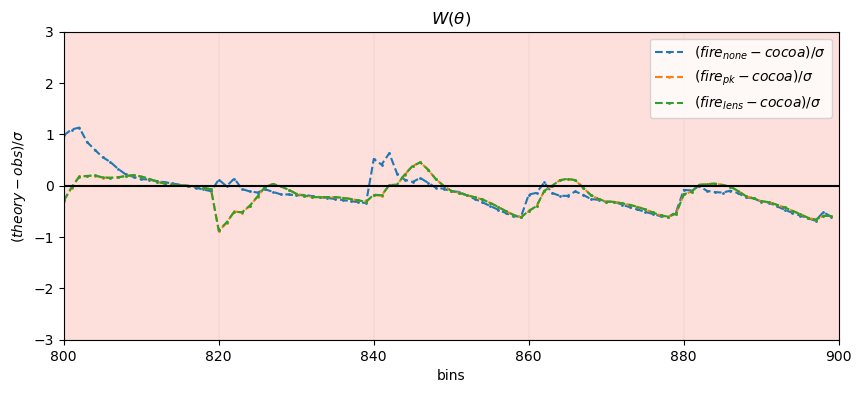

<Figure size 640x480 with 0 Axes>

In [6]:
compare_theory_vectors_1(tot_msk_filepath='/project/chihway/junzhou/cocoa/Cocoa/projects/des_y3/data/y1_data/des_y1_obs.mask',
                         datacov_filepath='/project/chihway/junzhou/cocoa/Cocoa/projects/des_y3/data/y1_data/des_y1_obs_cov',
                         cocoa_theory_filepath='/project/chihway/junzhou/cocoa/Cocoa/projects/des_y3/chains/des_y1_3x2pt_modelvector',
                         features=['none','pk', 'lens'],
                         firecrown_filepaths= [f'/project/chihway/junzhou/firecrown/examples/des_y1_3x2pt/output_factory{i+1}/data_vector/firecrown_theory.txt' for i in range(3)],
                         plot_selection= [True, True, True, True],
                         )
    
    

#### now match the k of cocoa and firecrown

In [8]:
readpath = '/project/chihway/junzhou/cocoa/Cocoa/projects/des_y3/chains/des_y1_3x2pt.1.txt'
#overwrite value.ini file
for i in range(1,4):
    outputpath = f'/project/chihway/junzhou/firecrown/examples/des_y1_3x2pt/cosmosis/values_3x2pt_test{i}.ini'
    convert_c2f(readpath, outputpath, overwrite=True)

#align nonlinear option
for i in range(3):
    filepath = f'/project/chihway/junzhou/firecrown/examples/des_y1_3x2pt/cosmosis/factory_3x2pt_test{i+1}.ini'
    Sub(filepath, 'nonlinear', 'pk')

#make sure cocoa's option in kmax
filepath = '/project/chihway/junzhou/cocoa/Cocoa/projects/des_y3/des_y1_3x2pt.yaml'
Sub(filepath, 'kmax_boltzmann', '5.0')

#compare firecrown's option in kmax
values = ['5.0', '20.0', '50.0']
for i in range(3):
    filepath = f'/project/chihway/junzhou/firecrown/examples/des_y1_3x2pt/cosmosis/factory_3x2pt_test{i+1}.ini'
    Sub(filepath, 'kmax', values[i])

In [9]:
%%bash

eval "$(conda shell.bash hook)"
conda activate firecrown_developer
cd ./firecrown/examples/des_y1_3x2pt

srun --nodes=1 --ntasks=1 --cpus-per-task=7 \
     --time=00:10:00 --account=pi-chihway --partition=caslake \
     cosmosis cosmosis/factory_3x2pt_test1.ini &

srun --nodes=1 --ntasks=1 --cpus-per-task=7 \
     --time=00:10:00 --account=pi-chihway --partition=caslake \
     cosmosis cosmosis/factory_3x2pt_test2.ini &

srun --nodes=1 --ntasks=1 --cpus-per-task=7 \
     --time=00:10:00 --account=pi-chihway --partition=caslake \
     cosmosis cosmosis/factory_3x2pt_test3.ini &

wait
#cosmosis cosmosis/factory_3x2pt_test1.ini
#cosmosis cosmosis/factory_3x2pt_test2.ini
#cosmosis cosmosis/factory_3x2pt_test3.ini

srun: Verify job submission ...
srun: Using a shared partition ...
srun: Partition: caslake
srun: QOS-Flag: caslake
srun: Account: pi-chihway
srun: Verification: ***PASSED***
srun: job 31978293 queued and waiting for resources
srun: Verify job submission ...
srun: Using a shared partition ...
srun: Partition: caslake
srun: QOS-Flag: caslake
srun: Account: pi-chihway
srun: Verification: ***PASSED***
srun: job 31978294 queued and waiting for resources
srun: Verify job submission ...
srun: Using a shared partition ...
srun: Partition: caslake
srun: QOS-Flag: caslake
srun: Account: pi-chihway
srun: Verification: ***PASSED***
srun: job 31978295 queued and waiting for resources
srun: job 31978293 has been allocated resources
srun: job 31978294 has been allocated resources
srun: job 31978295 has been allocated resources


Setting up pipeline from parameter file cosmosis/factory_3x2pt_test2.ini
------------------------------------------------------------------------

Setting up module consistency
------------------------------

Setting up module camb
-----------------------

Setting up module firecrown_likelihood
---------------------------------------
Setup all pipeline modules

Module timing:
consistency 0.001983
camb 0.002192
firecrown_likelihood 0.917238

Parameter Priors
----------------
cosmological_parameters--omega_c     ~ delta(0.24963745836910997)
cosmological_parameters--omega_b     ~ delta(0.044)
cosmological_parameters--omega_k     ~ delta(0.0)
cosmological_parameters--tau         ~ delta(0.0697186)
cosmological_parameters--n_s         ~ delta(0.968)
cosmological_parameters--sigma_8     ~ delta(0.84892334)
cosmological_parameters--h0          ~ delta(0.6881)
cosmological_parameters--w           ~ delta(-1.0)
cosmological_parameters--wa          ~ delta(0.0)
cosmological_parameters--mnu      

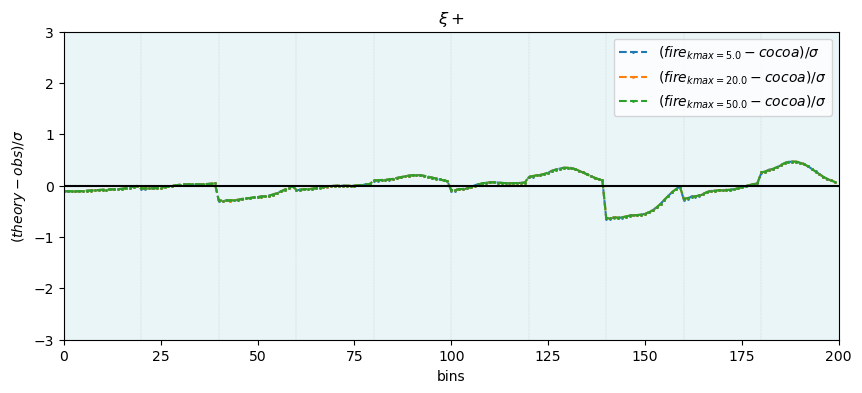

<Figure size 640x480 with 0 Axes>

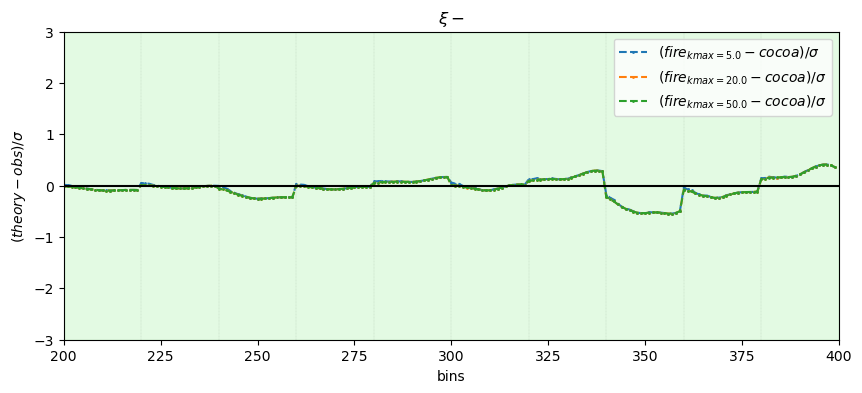

<Figure size 640x480 with 0 Axes>

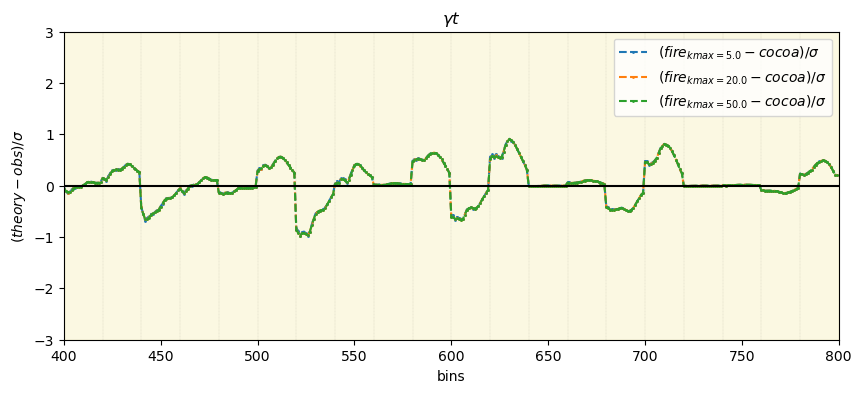

<Figure size 640x480 with 0 Axes>

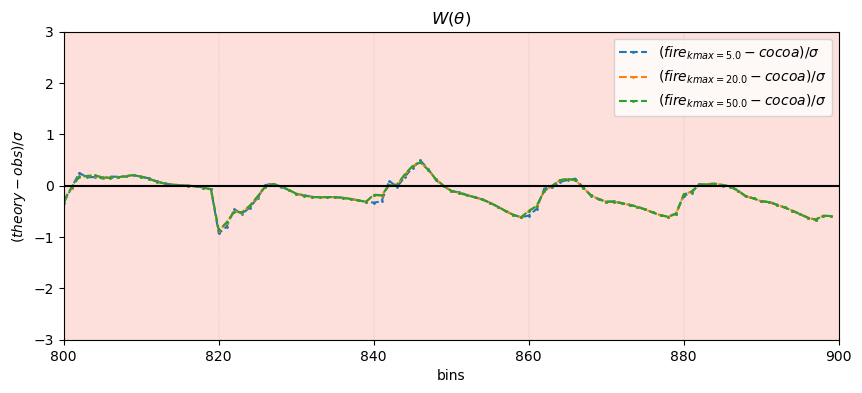

<Figure size 640x480 with 0 Axes>

In [10]:
compare_theory_vectors_1(tot_msk_filepath='/project/chihway/junzhou/cocoa/Cocoa/projects/des_y3/data/y1_data/des_y1_obs.mask',
                         datacov_filepath='/project/chihway/junzhou/cocoa/Cocoa/projects/des_y3/data/y1_data/des_y1_obs_cov',
                         cocoa_theory_filepath='/project/chihway/junzhou/cocoa/Cocoa/projects/des_y3/chains/des_y1_3x2pt_modelvector',
                         features=['kmax=5.0','kmax=20.0', 'kmax=50.0'],
                         firecrown_filepaths= [f'/project/chihway/junzhou/firecrown/examples/des_y1_3x2pt/output_factory{i+1}/data_vector/firecrown_theory.txt' for i in range(3)],
                         plot_selection= [True, True, True, True],
                         )

In [ ]:
readpath = '/project/chihway/junzhou/cocoa/Cocoa/projects/des_y3/chains/des_y1_3x2pt.1.txt'
#overwrite value.ini file
for i in range(1,4):
    outputpath = f'/project/chihway/junzhou/firecrown/examples/des_y1_3x2pt/cosmosis/values_3x2pt_test{i}.ini'
    convert_c2f(readpath, outputpath, overwrite=True)

#align nonlinear option
for i in range(3):
    filepath = f'/project/chihway/junzhou/firecrown/examples/des_y1_3x2pt/cosmosis/factory_3x2pt_test{i+1}.ini'
    Sub(filepath, 'nonlinear', 'pk')

#make sure cocoa's option in kmax
filepath = '/project/chihway/junzhou/cocoa/Cocoa/projects/des_y3/des_y1_3x2pt.yaml'
Sub(filepath, 'kmax_boltzmann', '5.0')

#align firecrown's option in kmax
for i in range(3):
    filepath = f'/project/chihway/junzhou/firecrown/examples/des_y1_3x2pt/cosmosis/factory_3x2pt_test{i+1}.ini'
    Sub(filepath, 'kmax', '5.0')


filepath1 = f'./firecrown/examples/des_y1_3x2pt/cosmosis/values_3x2pt_test1.ini'
filepath2 = f'./firecrown/examples/des_y1_3x2pt/cosmosis/values_3x2pt_test2.ini'
change(filepath2, 'sigma_8', 'A_s', '2.26e-9')

In [12]:
%%bash

eval "$(conda shell.bash hook)"
conda activate firecrown_developer
cd ./firecrown/examples/des_y1_3x2pt

srun --nodes=1 --ntasks=1 --cpus-per-task=7 \
     --time=00:10:00 --account=pi-chihway --partition=caslake \
     cosmosis cosmosis/factory_3x2pt_test1.ini &

srun --nodes=1 --ntasks=1 --cpus-per-task=7 \
     --time=00:10:00 --account=pi-chihway --partition=caslake \
     cosmosis cosmosis/factory_3x2pt_test2.ini &

srun --nodes=1 --ntasks=1 --cpus-per-task=7 \
     --time=00:10:00 --account=pi-chihway --partition=caslake \
     cosmosis cosmosis/factory_3x2pt_test3.ini &

wait
#cosmosis cosmosis/factory_3x2pt_test1.ini
#cosmosis cosmosis/factory_3x2pt_test2.ini
#cosmosis cosmosis/factory_3x2pt_test3.ini

srun: Verify job submission ...
srun: Using a shared partition ...
srun: Partition: caslake
srun: QOS-Flag: caslake
srun: Account: pi-chihway
srun: Verification: ***PASSED***
srun: job 31978452 queued and waiting for resources
srun: Verify job submission ...
srun: Using a shared partition ...
srun: Partition: caslake
srun: QOS-Flag: caslake
srun: Account: pi-chihway
srun: Verification: ***PASSED***
srun: job 31978453 queued and waiting for resources
srun: Verify job submission ...
srun: Using a shared partition ...
srun: Partition: caslake
srun: QOS-Flag: caslake
srun: Account: pi-chihway
srun: Verification: ***PASSED***
srun: job 31978454 queued and waiting for resources
srun: job 31978452 has been allocated resources
srun: job 31978453 has been allocated resources
srun: job 31978454 has been allocated resources


Setting up pipeline from parameter file cosmosis/factory_3x2pt_test3.ini
------------------------------------------------------------------------
Setting up pipeline from parameter file cosmosis/factory_3x2pt_test2.ini
------------------------------------------------------------------------

Setting up module consistency
------------------------------

Setting up module camb
-----------------------

Setting up module firecrown_likelihood
---------------------------------------

Setting up module consistency
------------------------------

Setting up module camb
-----------------------

Setting up module firecrown_likelihood
---------------------------------------
Setup all pipeline modules

Module timing:
consistency 0.001997
camb 0.002233
firecrown_likelihood 0.396959

Parameter Priors
----------------
cosmological_parameters--omega_c     ~ delta(0.24963745836910997)
cosmological_parameters--omega_b     ~ delta(0.044)
cosmological_parameters--omega_k     ~ delta(0.0)
cosmological_para

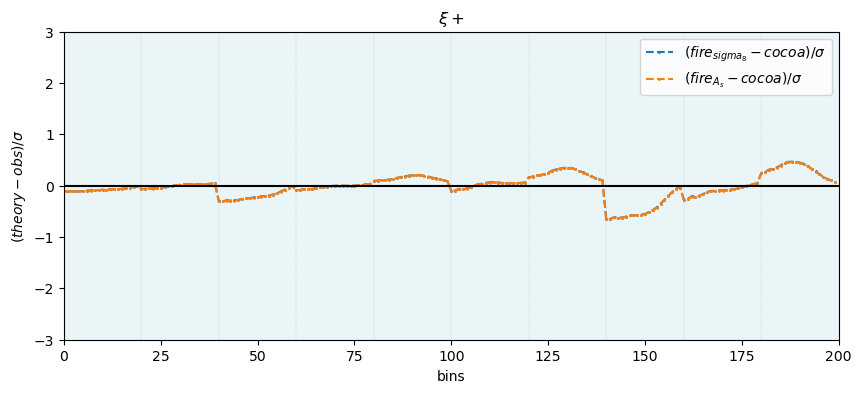

<Figure size 640x480 with 0 Axes>

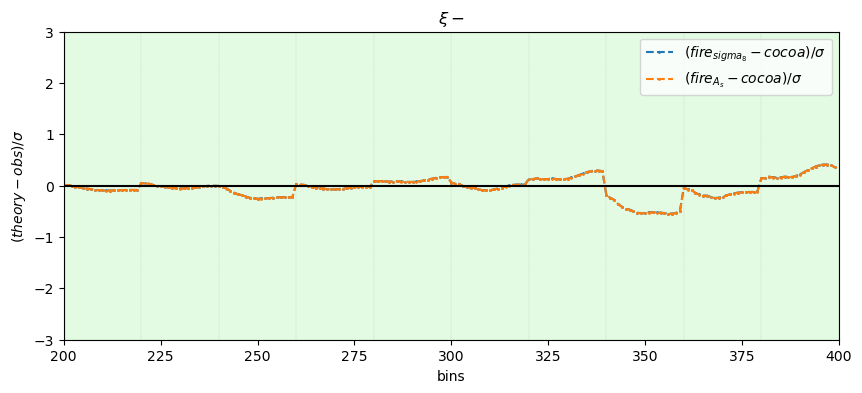

<Figure size 640x480 with 0 Axes>

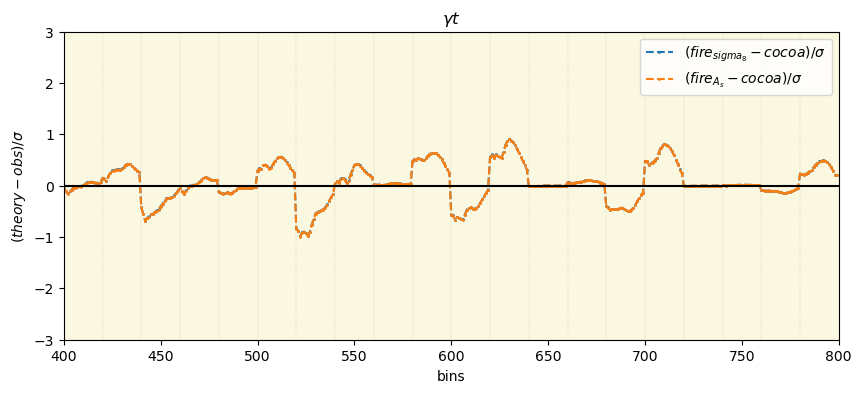

<Figure size 640x480 with 0 Axes>

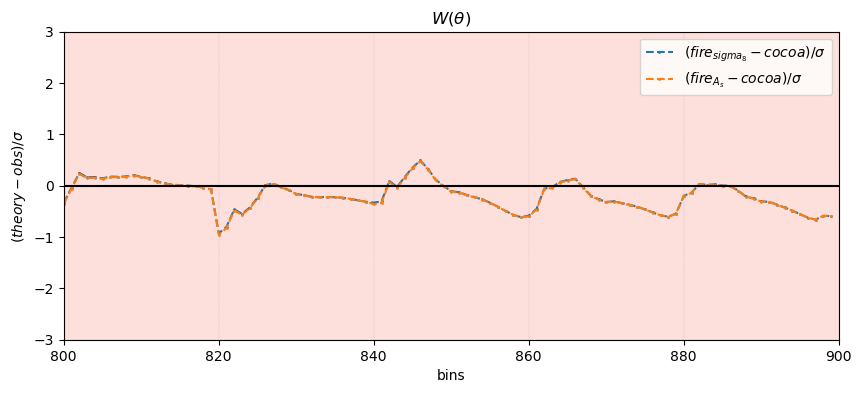

<Figure size 640x480 with 0 Axes>

In [13]:
compare_theory_vectors_1(tot_msk_filepath='/project/chihway/junzhou/cocoa/Cocoa/projects/des_y3/data/y1_data/des_y1_obs.mask',
                         datacov_filepath='/project/chihway/junzhou/cocoa/Cocoa/projects/des_y3/data/y1_data/des_y1_obs_cov',
                         cocoa_theory_filepath='/project/chihway/junzhou/cocoa/Cocoa/projects/des_y3/chains/des_y1_3x2pt_modelvector',
                         features=['sigma_8','A_s'],
                         firecrown_filepaths= [f'/project/chihway/junzhou/firecrown/examples/des_y1_3x2pt/output_factory{i+1}/data_vector/firecrown_theory.txt' for i in range(2)],
                         plot_selection= [True, True, True, True],
                         )

In [ ]:
###--------------------------------------algin everything--------------------------------###
readpath = '/project/chihway/junzhou/cocoa/Cocoa/projects/des_y3/chains/des_y1_3x2pt.1.txt'
#overwrite value.ini file
for i in range(1,4):
    outputpath = f'/project/chihway/junzhou/firecrown/examples/des_y1_3x2pt/cosmosis/values_3x2pt_test{i}.ini'
    convert_c2f(readpath, outputpath, overwrite=True)

#align nonlinear option
for i in range(3):
    filepath = f'/project/chihway/junzhou/firecrown/examples/des_y1_3x2pt/cosmosis/factory_3x2pt_test{i+1}.ini'
    Sub(filepath, 'nonlinear', 'pk')

#make sure cocoa's option in kmax
filepath = '/project/chihway/junzhou/cocoa/Cocoa/projects/des_y3/des_y1_3x2pt.yaml'
Sub(filepath, 'kmax_boltzmann', '5.0')

#align firecrown's option in kmax
for i in range(3):
    filepath = f'/project/chihway/junzhou/firecrown/examples/des_y1_3x2pt/cosmosis/factory_3x2pt_test{i+1}.ini'
    Sub(filepath, 'kmax', '5.0')

for i in range(3):
    filepath = f'./firecrown/examples/des_y1_3x2pt/cosmosis/values_3x2pt_test{i+1}.ini'
    change(filepath, 'sigma_8', 'A_s', '2.26e-9')
    
#----------------------------------new changes----------------------------------------------#
'''
halofit_version: default (mead) -> takahashi
   use_ppf_w : default (False) -> True
   AccuracyBoost: default (1.0) -> 1.05 : covered by likelihood or not?
   k_per_logint: defaut (0.0) -> 20
'''

filepath = f'./firecrown/examples/des_y1_3x2pt/cosmosis/factory_3x2pt_test{1}.ini'
add(filepath=filepath, Class = '[camb]', key='halofit_version', item='takahashi')
add(filepath=filepath, Class = '[camb]', key='use_ppf_w', item='True')
add(filepath=filepath, Class = '[camb]', key='AccuracyBoost', item='1.05')
add(filepath=filepath, Class = '[camb]', key='k_per_logint', item='20')


In [9]:
%%bash

eval "$(conda shell.bash hook)"
conda activate firecrown_developer
cd ./firecrown/examples/des_y1_3x2pt

srun --nodes=1 --ntasks=1 --cpus-per-task=7 \
     --time=00:10:00 --account=pi-chihway --partition=caslake \
     cosmosis cosmosis/factory_3x2pt_test1.ini &

srun --nodes=1 --ntasks=1 --cpus-per-task=7 \
     --time=00:10:00 --account=pi-chihway --partition=caslake \
     cosmosis cosmosis/factory_3x2pt_test2.ini &

wait
#cosmosis cosmosis/factory_3x2pt_test1.ini
#cosmosis cosmosis/factory_3x2pt_test2.ini
#cosmosis cosmosis/factory_3x2pt_test3.ini

srun: Verify job submission ...
srun: Using a shared partition ...
srun: Partition: caslake
srun: QOS-Flag: caslake
srun: Account: pi-chihway
srun: Verification: ***PASSED***
srun: job 32003793 queued and waiting for resources
srun: Verify job submission ...
srun: Using a shared partition ...
srun: Partition: caslake
srun: QOS-Flag: caslake
srun: Account: pi-chihway
srun: Verification: ***PASSED***
srun: job 32003794 queued and waiting for resources
srun: job 32003793 has been allocated resources
srun: job 32003794 has been allocated resources


Setting up pipeline from parameter file cosmosis/factory_3x2pt_test2.ini
------------------------------------------------------------------------
Setting up pipeline from parameter file cosmosis/factory_3x2pt_test1.ini
------------------------------------------------------------------------

Setting up module consistency
------------------------------

Setting up module consistency
------------------------------

Setting up module camb
-----------------------

Setting up module camb
-----------------------

Setting up module firecrown_likelihood
---------------------------------------

Setting up module firecrown_likelihood
---------------------------------------
Setup all pipeline modules

Module timing:
consistency 0.002099
camb 0.002245
firecrown_likelihood 0.568440

Parameter Priors
----------------
cosmological_parameters--omega_c     ~ delta(0.24963745836910997)
cosmological_parameters--omega_b     ~ delta(0.044)
cosmological_parameters--omega_k     ~ delta(0.0)
cosmological_para

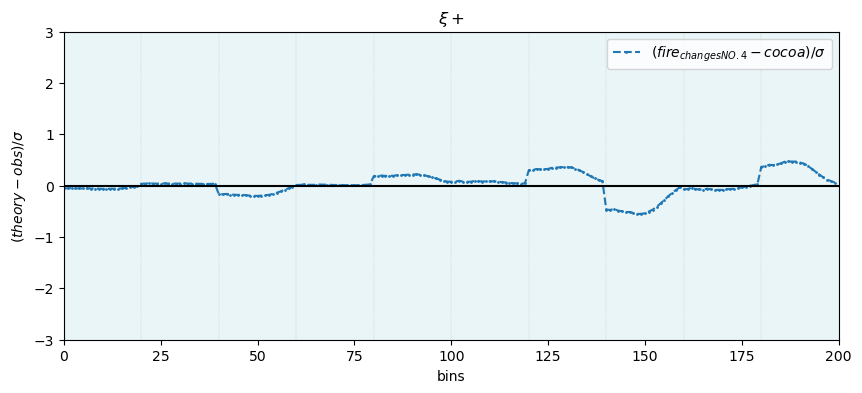

<Figure size 640x480 with 0 Axes>

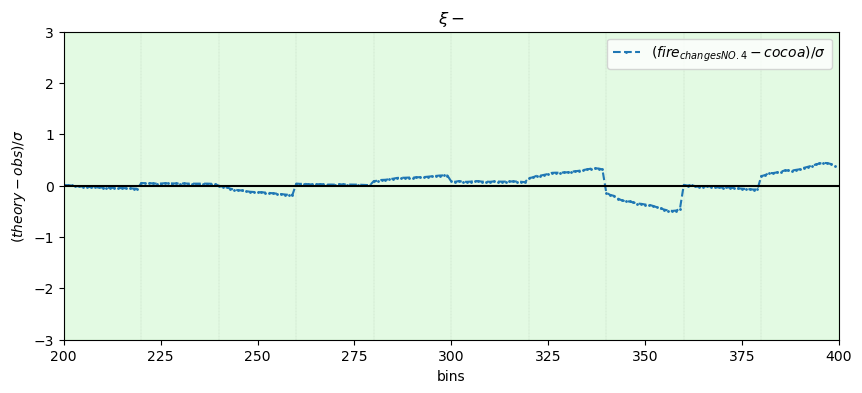

<Figure size 640x480 with 0 Axes>

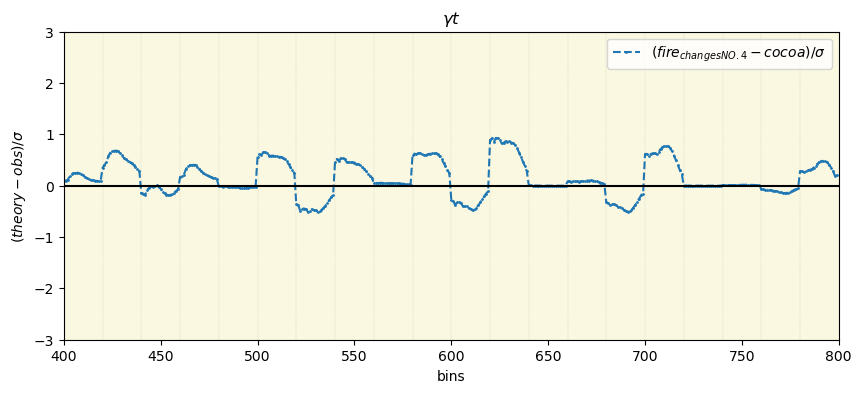

<Figure size 640x480 with 0 Axes>

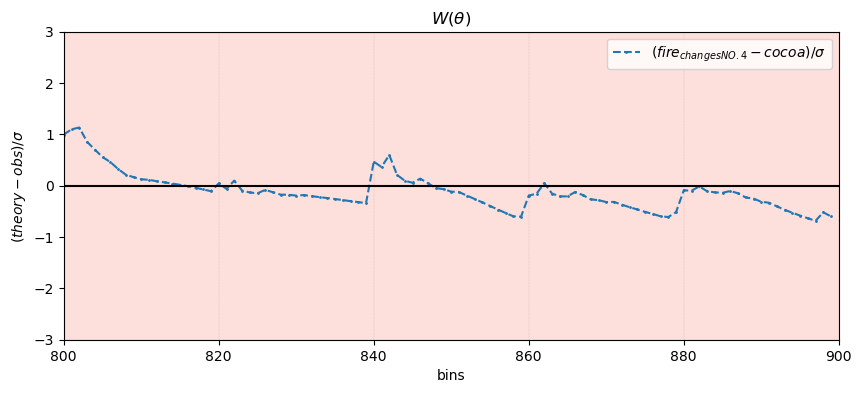

<Figure size 640x480 with 0 Axes>

In [14]:
compare_theory_vectors_1(tot_msk_filepath='/project/chihway/junzhou/cocoa/Cocoa/projects/des_y3/data/y1_data/des_y1_obs.mask',
                         datacov_filepath='/project/chihway/junzhou/cocoa/Cocoa/projects/des_y3/data/y1_data/des_y1_obs_cov',
                         cocoa_theory_filepath='/project/chihway/junzhou/cocoa/Cocoa/projects/des_y3/chains/des_y1_3x2pt_modelvector',
                         features=['changesNO.4'],
                         firecrown_filepaths= [f'/project/chihway/junzhou/firecrown/examples/des_y1_3x2pt/output_factory{i+1}/data_vector/firecrown_theory.txt' for i in range(1)],
                         plot_selection= [True, True, True, True],
                         )

In [6]:
%%bash

eval "$(conda shell.bash hook)"
conda activate cocoa
cd ./cocoa/Cocoa
source start_cocoa.sh
export OMP_PROC_BIND=close; export OMP_NUM_THREADS=8

mpirun -n 1 --oversubscribe --mca pml ^ucx --mca btl vader,tcp,self --bind-to core:overload-allowed --rank-by slot --map-by numa:pe=${OMP_NUM_THREADS} cobaya-run  ./projects/des_y3/des_y1_3x2pt.yaml -f

        (start_all_projects.sh) warning:  DIR DOES NOT EXIST (/project/chihway/junzhou/cocoa/Cocoa/projects/.ipynb_checkpoints/scripts) 
        (create_link_all_projects.sh) warning:  DIR DOES NOT EXIST (/project/chihway/junzhou/cocoa/Cocoa/projects/.ipynb_checkpoints/interface) 
        (create_link_all_projects.sh) warning:  DIR DOES NOT EXIST (/project/chihway/junzhou/cocoa/Cocoa/projects/.ipynb_checkpoints/likelihood) 
        (create_link_all_projects.sh) warning:  DIR DOES NOT EXIST (/project/chihway/junzhou/cocoa/Cocoa/projects/.ipynb_checkpoints/data) 


--------------------------------------------------------------------------
PRTE has detected that the head of the session directory tree (where
scratch files and shared memory backing storage will be placed)
resides on a shared file system:

   Directory: /home/junzhou
   File system type: gpfs

For performance reasons, it is strongly recommended that the session
directory be located on a local file system. This can be controlled by
setting the system temporary directory to be used by PRTE using either
the TMPDIR envar or the "prte_tmpdir_base" MCA param.

If you need the temporary directory to be different on remote nodes
from the local one where prterun is running (e.g., when a login node is
being employed), then you can set the local temporary directory using
the "prte_local_tmpdir_base" MCA param and the one to be used on all
other nodes using the "prte_remote_tmpdir_base" param.

This is only a warning advisory and your job will continue. You can
disable this warning in the future

 2025-06-28 15:00:58,475 [output] Output to be read-from/written-into folder './projects/des_y3/chains', with prefix 'des_y1_3x2pt'
 2025-06-28 15:00:58,476 [output] Found existing info files with the requested output prefix: './projects/des_y3/chains/des_y1_3x2pt'
 2025-06-28 15:00:58,476 [output] Will delete previous products ('force' was requested).

Classy could not be found in your system.
Here are some suggestions:

	 -Download the Class from class-code.net and install it
	  together with its wrapper classy (type 'make' instead of
	  'make class'
	 -If you know that Class is installed on your system
	  and yet classy could not be installed, try re-compiling
	  Class with just ''make'' instead of ''make class''
NOTICE: Even without classy you can still use EuclidEmulator2
        to emulate boost factors. You won't be able to compute
        full power spectra, though.
 2025-06-28 15:01:07,008 [camb] Attempting import from ./external_modules/code/CAMB.
 2025-06-28 15:01:07,019 [ca

In [1]:
%%bash

eval "$(conda shell.bash hook)"
conda activate firecrown_developer
cd ./firecrown/examples/des_y1_3x2pt

srun --nodes=1 --ntasks=1 --cpus-per-task=7 \
     --time=00:10:00 --account=pi-chihway --partition=caslake \
     cosmosis cosmosis/factory_3x2pt_test1.ini

srun: Verify job submission ...
srun: Using a shared partition ...
srun: Partition: caslake
srun: QOS-Flag: caslake
srun: Account: pi-chihway
srun: Verification: ***PASSED***
srun: job 32421823 queued and waiting for resources
srun: job 32421823 has been allocated resources


Setting up pipeline from parameter file cosmosis/factory_3x2pt_test1.ini
------------------------------------------------------------------------

Setting up module consistency
------------------------------

Setting up module camb
-----------------------

Setting up module firecrown_likelihood
---------------------------------------
Setup all pipeline modules

Module timing:
consistency 0.002171
camb 0.002511
firecrown_likelihood 0.555430

Parameter Priors
----------------
cosmological_parameters--omega_c     ~ delta(0.24963745836910997)
cosmological_parameters--omega_b     ~ delta(0.044)
cosmological_parameters--omega_k     ~ delta(0.0)
cosmological_parameters--tau         ~ delta(0.0697186)
cosmological_parameters--n_s         ~ delta(0.968)
cosmological_parameters--a_s         ~ delta(2.26e-09)
cosmological_parameters--h0          ~ delta(0.6881)
cosmological_parameters--w           ~ delta(-1.0)
cosmological_parameters--wa          ~ delta(0.0)
cosmological_parameters--mnu        

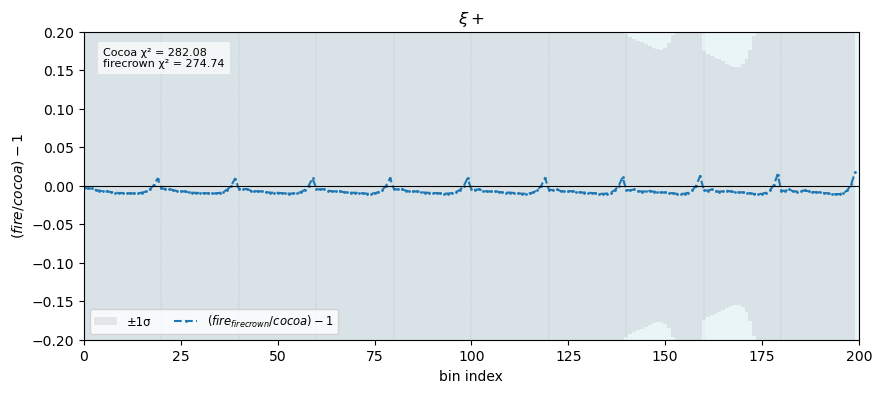

<Figure size 640x480 with 0 Axes>

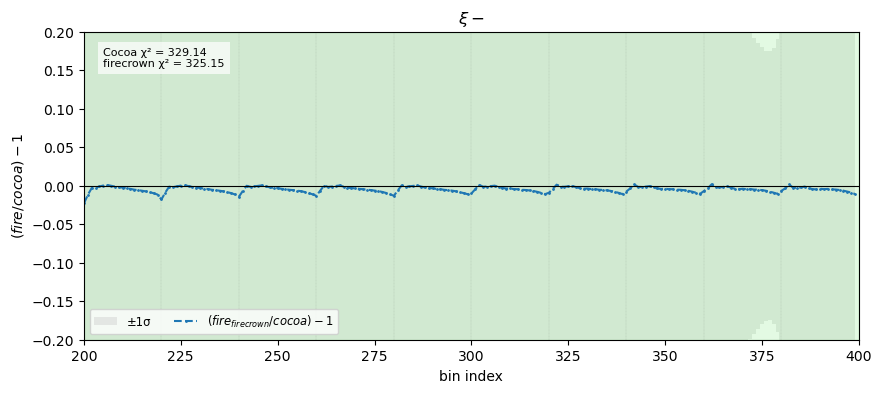

<Figure size 640x480 with 0 Axes>

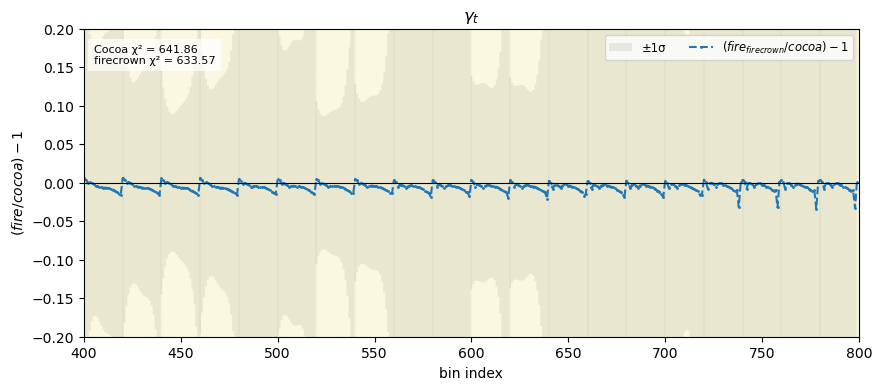

<Figure size 640x480 with 0 Axes>

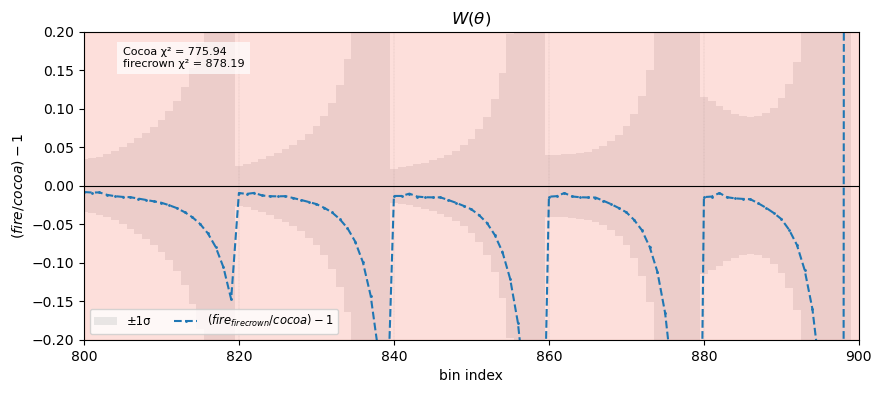

Total Cocoa χ²: 2029.02
Total firecrown χ²: 2111.64


<Figure size 640x480 with 0 Axes>

In [5]:
cosmosis = [f'/project/chihway/junzhou/firecrown/examples/des_y1_3x2pt/output_factory{i+1}/data_vector/firecrown_theory.txt' for i in range(1)]
ccl = [f'/project/chihway/junzhou/firecrown/examples/des_y1_3x2pt/output_factory1/data_vector/firecrown_theory.txt']

compare_theory_vectors_3(tot_msk_filepath='/project/chihway/junzhou/cocoa/Cocoa/projects/des_y3/data/y1_data/des_y1_obs.mask',
                         datacov_filepath='/project/chihway/junzhou/cocoa/Cocoa/projects/des_y3/data/y1_data/des_y1_obs_cov',
                         cocoa_theory_filepath='/project/chihway/junzhou/cocoa/Cocoa/projects/des_y3/chains/des_y1_3x2pt_modelvector',
                         features=['firecrown'],
                         firecrown_filepaths= ccl,
                         plot_selection= [True, True, True, True],
                         fiducial_obs_filepath = '/project/chihway/junzhou/cocoa/Cocoa/projects/des_y3/data/y1_data/des_y1_obs.datavector',
                         ylim=[-0.2,0.2]
                         )